<a href="https://colab.research.google.com/github/hida0/ESAA/blob/2022-1-Study/Study_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [공공 데이터 활용 온도 추정 AI 경진대회]
‘기상청 공공데이터를 활용한 온도추정’
- 저가의 센서로 관심대상의 온도를 단기간 측정하여 기상청의 관측 데이터와의 상관관계 모델을 만들고, 이후엔 생성된 모델을 통해 온도를 추정한다.

데이터 설명
-     대전지역에서 측정한 실내외 19곳의 센서데이터와, 주변 지역의 기상청 공공데이터를 semi-비식별화하여 제공합니다. 
-     센서는 온도를 측정하였습니다. 
-     모든 **데이터는 시간 순으로 정렬** 되어 있으며 **10분** 단위 데이터 입니다. 
-     **예측 대상**(target variable)은 **Y18**입니다. 
1.train.csv 
-     30일 간의 기상청 데이터 (X00-X39) 및 센서데이터 (Y00-Y17)
-     이후 3일 간의 기상청 데이터 (X00-X39) 및 센서데이터 (Y18)
2.test.csv 
-     train.csv 기간 이후 80일 간의 기상청 데이터 (X00-X39)
3.sample_submission.csv
-     제출 양식 예시

### 1. 라이브러리 및 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys, warnings
import seaborn as sns
if not sys.warnoptions: warnings.simplefilter("ignore")
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
pd.set_option('max_columns', 1040, 'max_rows', 140)

In [ ]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ESAA/2022-1 Study/Week2/train.csv")
print(train.shape)
train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/ESAA/2022-1 Study/Week2/test.csv")
print(test.shape)
test.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,0.0,199.6,0.0,36.0,1.1,0.0,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.0,194.7,0.0,84.0,59.9,0.0
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,0.0,194.0,0.0,127.7,0.6,0.0,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.0,173.1,0.0,84.0,60.5,0.0
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,0.0,172.9,0.0,59.0,0.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.0,208.6,0.0,85.0,60.8,0.0


In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/ESAA/2022-1 Study/Week2/sample_submission.csv")
print(submission.shape)
submission.head(3)

### 2. 데이터 전처리
- Y00칼럼부터 Y17칼럼까지만 포함한 trainX1과 Y18칼럼만 포함한 trainX2로 분할한다. trainX1에 Y18칼럼을 생성하고, Y18칼럼만 남기고 제거한다.
- trainX1와 trainX2를 상하결합하여 X 변수들과 Y18칼럼만 포함한 학습 데이터 train을 생성한다. Y18칼럼을 로그변환한다.
- train의 Y18칼럼만 떼어서 학습 데이터의 예측값인 Y 데이터로 저장한다.

In [ ]:
train.loc[:,'Y00':'Y17'].notnull()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4748,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4749,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4750,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 각 행의 모든 열이 notnull이 아닌지 확인
train.loc[:,'Y00':'Y17'].notnull().all(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
4747    False
4748    False
4749    False
4750    False
4751    False
Length: 4752, dtype: bool

In [ ]:
# Y00칼럼부터 Y17칼럼이 결측값이 아닌것 4320개와 결측값인것 432개
train.loc[:,'Y00':'Y17'].notnull().all(axis=1).value_counts()

True     4320
False     432
dtype: int64

In [ ]:
df_month = train[train.loc[:,'Y00':'Y17'].notnull().all(axis=1)].drop(columns = 'Y18') # 30일간 센서 데이터인 Y00칼럼부터 Y17칼럼이 결측값이 아닌것을 df_month로 저장
df_days = train[train['Y18'].notnull()].drop(train.loc[:,'Y00':'Y17'], axis=1) # 이후 3일간의 센서 데이터인 Y18칼럼을 포함하여 df_days로 저장

In [ ]:
# X칼럼과 Y00칼럼부터 Y17칼럼까지만 포함한 trainX1과 X칼럼과 Y18칼럼만 포함한 trainX2
trainX1 = df_month
trainX2 = df_days

In [ ]:
# trainX1에 예측값인 Y18 칼럼을 생성 : (Y06, Y10, Y12)의 평균과 (Y00, Y10, Y12)의 평균의 평균
trainX1['Y18'] = ((trainX1['Y06']+trainX1['Y10']+trainX1['Y12'])/3 + (trainX1['Y00']+trainX1['Y10']+trainX1['Y12'])/3)/2

# Y00칼럼부터 Y17칼럼을 제거하고 Y18칼럼만 포함
trainX1 = trainX1.drop(columns=['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'])
trainX1.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,9.250000
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,9.000000
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,8.666667


In [ ]:
train = pd.concat([trainX1, trainX2]) # trainX1과 trainX2를 상하로 결합하여 X칼럼과 Y18칼럼만 존재하는 데이터 생성
train['Y18'] = np.log1p(train['Y18']) # Y18칼럼을 로그변환

# 학습 데이터의 예측값 데이터 생성
y_train = train['Y18']

### 2. 데이터 전처리
- X 변수들의 칼럼명을 해당하는 각 기상 요소의 명칭으로 변경한다.

In [ ]:
# 학습 데이터와 테스트 데이터를 결합한 전체 데이터 생성
data = pd.concat([train.drop(columns=['Y18']), test])
print(data.shape)

data.index = [i for i in range(len(data))]

(16272, 41)


In [ ]:
# 기상청 데이터인 40개의 X 변수들을 각 5개씩의 기상 요소로 구분
기온 = ['X00', 'X07', 'X28', 'X31', 'X32']
현지기압 = ['X01', 'X06', 'X22', 'X27', 'X29']
풍속 = ['X02', 'X03', 'X18', 'X24', 'X26']
강수량 = ['X04', 'X10', 'X21', 'X36', 'X39']
해면기압 = ['X05', 'X08', 'X09', 'X23', 'X33']
일사량 = ['X11', 'X14', 'X16', 'X19', 'X34']
습도 = ['X12', 'X20', 'X30', 'X37', 'X38']
풍향 = ['X13', 'X15', 'X17', 'X25', 'X35']

lst = [기온, 현지기압, 풍속, 강수량, 해면기압, 일사량, 습도, 풍향]
name_lst = ['기온', '현지기압', '풍속', '강수량', '해면기압', '일사량', '습도', '풍향']

list(zip(lst, name_lst))

[(['X00', 'X07', 'X28', 'X31', 'X32'], '기온'),
 (['X01', 'X06', 'X22', 'X27', 'X29'], '현지기압'),
 (['X02', 'X03', 'X18', 'X24', 'X26'], '풍속'),
 (['X04', 'X10', 'X21', 'X36', 'X39'], '강수량'),
 (['X05', 'X08', 'X09', 'X23', 'X33'], '해면기압'),
 (['X11', 'X14', 'X16', 'X19', 'X34'], '일사량'),
 (['X12', 'X20', 'X30', 'X37', 'X38'], '습도'),
 (['X13', 'X15', 'X17', 'X25', 'X35'], '풍향')]

In [ ]:
col_names = {}
for l, n in zip(lst, name_lst):
    for i in range(5):
        col_names[f'{l[i]}'] = f'{n}_{i+1}'

col_names

{'X00': '기온_1',
 'X07': '기온_2',
 'X28': '기온_3',
 'X31': '기온_4',
 'X32': '기온_5',
 'X01': '현지기압_1',
 'X06': '현지기압_2',
 'X22': '현지기압_3',
 'X27': '현지기압_4',
 'X29': '현지기압_5',
 'X02': '풍속_1',
 'X03': '풍속_2',
 'X18': '풍속_3',
 'X24': '풍속_4',
 'X26': '풍속_5',
 'X04': '강수량_1',
 'X10': '강수량_2',
 'X21': '강수량_3',
 'X36': '강수량_4',
 'X39': '강수량_5',
 'X05': '해면기압_1',
 'X08': '해면기압_2',
 'X09': '해면기압_3',
 'X23': '해면기압_4',
 'X33': '해면기압_5',
 'X11': '일사량_1',
 'X14': '일사량_2',
 'X16': '일사량_3',
 'X19': '일사량_4',
 'X34': '일사량_5',
 'X12': '습도_1',
 'X20': '습도_2',
 'X30': '습도_3',
 'X37': '습도_4',
 'X38': '습도_5',
 'X13': '풍향_1',
 'X15': '풍향_2',
 'X17': '풍향_3',
 'X25': '풍향_4',
 'X35': '풍향_5'}

In [ ]:
# 모든 데이터의 칼럼명을 변경
data.rename(columns=col_names, inplace=True)
train.rename(columns=col_names, inplace=True)
test.rename(columns=col_names, inplace=True)

In [ ]:
train.head(3)

,id,기온_1,현지기압_1,풍속_1,풍속_2,강수량_1,해면기압_1,현지기압_2,기온_2,해면기압_2,해면기압_3,강수량_2,일사량_1,습도_1,풍향_1,일사량_2,풍향_2,일사량_3,풍향_3,풍속_3,일사량_4,습도_2,강수량_3,현지기압_3,해면기압_4,풍속_4,풍향_4,풍속_5,현지기압_4,기온_3,현지기압_5,습도_3,기온_4,기온_5,해면기압_5,일사량_5,풍향_5,강수량_4,습도_4,습도_5,강수량_5,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,2.327278
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,2.302585
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,2.268684


### 3. 변수 선택 및 모델 구축
#### 3-1. 시간대 변수
- 모든 데이터는 시간 순으로 정렬되어 있으며 10분 단위 데이터이다. 24시간의 시간대로 나타내기 위해 24시간에 해당하는 1440분을 10분 단위로 나타내는 144로 나눈다.
- 시간을 나타내는 id 칼럼을 **9개의 범위로 범주화**하여 전체 데이터와 학습 데이터에 time_cat이라는 새로운 칼럼을 생성한다. 

In [ ]:
# id 칼럼을 144로 나누고 남은 나머지를 정수로 저장
data['min'] = (data['id']%144).astype(int)
train['min'] = (train['id']%144).astype(int)

In [ ]:
# 시간대를 범주화하는 함수 생성
def f(x):
    if x < 18: return('t1')
    elif x < 39: return('t2')
    elif x < 48: return('t3')
    elif x < 72: return('t4')
    elif x < 86: return('t5')
    elif x < 102: return('t6')
    elif x < 114: return('t7')
    elif x < 126: return('t8')
    else: return('t9')

data['time_cat'] = data['min'].apply(f)
train['time_cat'] = train['min'].apply(f)

### 3. 변수 선택 및 모델 구축
#### 3-1. 시간대 변수
- 범주화된 시간대별로 예측치인 Y18칼럼에 대한 합, 평균, 편차를 계산한다.

In [ ]:
train.groupby(['time_cat'])['Y18'].agg([('시간별합', 'sum')]).reset_index()
# agg() 함수에 리스트로 칼럼명과 함수명을 적으면, 적용하는 함수에 대한 계산값을 지정한 칼럼명으로 저장한다.

,time_cat,시간별합
0,t1,1675.266865
1,t2,1891.240687
2,t3,879.261490
3,t4,2673.984448
4,t5,1630.469025
5,t6,1828.246130
6,t7,1324.957688
7,t8,1250.967082
8,t9,1772.658488


In [ ]:
features = []
f1 = train.groupby(['time_cat'])['Y18'].agg([('시간별합', 'sum')]).reset_index()
features.append(f1)
f2 = train.groupby(['time_cat'])['Y18'].agg([('시간별평균', 'mean')]).reset_index()
features.append(f2)
f3 = train.groupby(['time_cat'])['Y18'].agg([('시간별표준편차', 'std')]).reset_index()
features.append(f3)

for f in features:
    print(f)

  time_cat         시간별합
0       t1  1675.266865
1       t2  1891.240687
2       t3   879.261490
3       t4  2673.984448
4       t5  1630.469025
5       t6  1828.246130
6       t7  1324.957688
7       t8  1250.967082
8       t9  1772.658488
  time_cat     시간별평균
0       t1  2.820315
1       t2  2.729063
2       t3  2.960476
3       t4  3.376243
4       t5  3.529154
5       t6  3.462587
6       t7  3.345853
7       t8  3.159008
8       t9  2.984274
  time_cat   시간별표준편차
0       t1  0.214232
1       t2  0.234021
2       t3  0.161029
3       t4  0.203057
4       t5  0.156612
5       t6  0.147517
6       t7  0.140545
7       t8  0.128983
8       t9  0.149941


In [ ]:
# pd.merge는 공통의 열을 기준으로 두 데이터프레임을 합쳐준다
# 기준열 이름이 같을 때 pd.merge(left, right, on = '기준열', how = '조인방식')
for f in features:
    data = pd.merge(data, f, on=['time_cat'], how='left') # Left Join : 왼쪽 데이터프레임을 기준으로 조인

print(data.shape)
data.head(2)

(16272, 46)


,id,기온_1,현지기압_1,풍속_1,풍속_2,강수량_1,해면기압_1,현지기압_2,기온_2,해면기압_2,해면기압_3,강수량_2,일사량_1,습도_1,풍향_1,일사량_2,풍향_2,일사량_3,풍향_3,풍속_3,일사량_4,습도_2,강수량_3,현지기압_3,해면기압_4,풍속_4,풍향_4,풍속_5,현지기압_4,기온_3,현지기압_5,습도_3,기온_4,기온_5,해면기압_5,일사량_5,풍향_5,강수량_4,습도_4,습도_5,강수량_5,min,time_cat,시간별합,시간별평균,시간별표준편차
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,0,t1,1675.266865,2.820315,0.214232
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,1,t1,1675.266865,2.820315,0.214232


### 3. 변수 선택 및 모델 구축
#### 3-2. 강수량 변수
- 강수량_2 변수에 대해 0.5를 기준으로 전체 데이터와 학습 데이터에 rain이라는 새로운 칼럼을 생성한다.
- rain칼럼은 강수량이 0.5이하면 0을, 강수량이 0.5보다 크면 1을 가진다.
- 시간대와 강수량 그룹별로 예측치인 Y18칼럼에 대한 합, 평균, 편차를 계산한다.

In [ ]:
# 강수량을 범주화하는 함수 생성 : 강수량이 0.5이하면 0, 강수량이 0.5보다 크면 1
def f2(x):
    if x <= 0.5:
        return(0)
    else:
        return(1)

data['rain'] = data['강수량_2'].apply(f2)
train['rain'] = train['강수량_2'].apply(f2)

In [ ]:
train.groupby(['time_cat', 'rain'])['Y18'].agg([('시간강수별합', 'sum')]).reset_index()

,time_cat,rain,시간강수별합
0,t1,0,1596.033526
1,t1,1,79.233339
2,t2,0,1723.361607
3,t2,1,167.879080
4,t3,0,801.839941
5,t3,1,77.421549
6,t4,0,2456.461361
7,t4,1,217.523087
8,t5,0,1498.240857
9,t5,1,132.228168


In [ ]:
features = []
f1 = train.groupby(['time_cat', 'rain'])['Y18'].agg([('시간강수별합', 'sum')]).reset_index()
features.append(f1)
f2 = train.groupby(['time_cat', 'rain'])['Y18'].agg([('시간강수별평균', 'mean')]).reset_index()
features.append(f2)
f3 = train.groupby(['time_cat', 'rain'])['Y18'].agg([('시간강수별표준편차', 'std')]).reset_index()
features.append(f3)

In [ ]:
for f in features:
    data = pd.merge(data, f, on=['time_cat', 'rain'], how='left') # Left Join : 왼쪽 데이터프레임을 기준으로 조인

print(data.shape) # 칼럼이 4(1+3)개 증가
data.head(3)

(16272, 50)


,id,기온_1,현지기압_1,풍속_1,풍속_2,강수량_1,해면기압_1,현지기압_2,기온_2,해면기압_2,해면기압_3,강수량_2,일사량_1,습도_1,풍향_1,일사량_2,풍향_2,일사량_3,풍향_3,풍속_3,일사량_4,습도_2,강수량_3,현지기압_3,해면기압_4,풍속_4,풍향_4,풍속_5,현지기압_4,기온_3,현지기압_5,습도_3,기온_4,기온_5,해면기압_5,일사량_5,풍향_5,강수량_4,습도_4,습도_5,강수량_5,min,time_cat,시간별합,시간별평균,시간별표준편차,rain,시간강수별합,시간강수별평균,시간강수별표준편차
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,0,t1,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,1,t1,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,2,t1,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439


### 3. 변수 선택 및 모델 구축
#### 3-1. 시간대 변수2
- 시간대를 나타내는 칼럼 **time_cat에 원핫인코딩**을 수행한다.

In [ ]:
data = pd.get_dummies(data, columns=['time_cat'])

### 3. 변수 선택 및 모델 구축
#### 3-3. 시간에 따른 기온 차이 변수
- 기온을 나타내는 5개 변수('기온_1', '기온_2', '기온_3', '기온_4', '기온_5')에 대해 6시간(360분), 12시간(720분), 24시간(1440분), 36시간(2160분) 차이에 대한 변수를 만든다.

In [ ]:
temper_lst = ['기온_1', '기온_2', '기온_3', '기온_4', '기온_5']

In [ ]:
# 24시간(1440분) 차이에 대한 변수
for temper in temper_lst:
    interval = 144
    diff_temper = []
    for i in range(data.shape[0]): # 16272
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff_1d{}'.format(temper)] = diff_temper

In [ ]:
# 12시간(720분) 차이에 대한 변수
for temper in temper_lst:
    interval = 72
    diff_temper = []
    for i in range(data.shape[0]): # 16272
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff2_{}'.format(temper)] = diff_temper

In [ ]:
# 6시간(360분) 차이에 대한 변수
for temper in temper_lst:
    interval = 36
    diff_temper = []
    for i in range(data.shape[0]): # 16272
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff3_{}'.format(temper)] = diff_temper

In [ ]:
# 36시간(2160분) 차이에 대한 변수
for temper in temper_lst:
    interval = 216
    diff_temper = []
    for i in range(data.shape[0]): # 16272
        if i > interval:
            diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
            diff_temper.append(diff)
        else:
            diff = data[temper].iloc[i] - data[temper].iloc[0]
            diff_temper.append(diff)
    data['diff2_5min_{}'.format(temper)] = diff_temper

### 3. 변수 선택 및 모델 구축
#### 3-4. 시간에 따른 습도 차이 변수
- 기온을 나타내는 3개 변수('습도_1', '습도_2', '습도_3')에 대해 6시간(360분), 12시간(720분), 24시간(1440분), 36시간(2160분) 차이에 대한 변수를 만든다.

In [ ]:
wet_lst = ['습도_1', '습도_2', '습도_3']

In [ ]:
# 24시간(1440분) 차이에 대한 변수
for wet in wet_lst:
    interval = 144
    diff_wet = []
    for i in range(data.shape[0]): 
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도144_{}'.format(wet)] = diff_wet

In [ ]:
# 12시간(720분) 차이에 대한 변수
for wet in wet_lst:
    interval = 72
    diff_wet = []
    for i in range(data.shape[0]): 
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도72_{}'.format(wet)] = diff_wet

In [ ]:
# 36시간(2160분) 차이에 대한 변수
for wet in wet_lst:
    interval = 216
    diff_wet = []
    for i in range(data.shape[0]): 
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도216_{}'.format(wet)] = diff_wet

In [ ]:
# 6시간(360분) 차이에 대한 변수
for wet in wet_lst:
    interval = 36
    diff_wet = []
    for i in range(data.shape[0]): 
        if i > interval:
            diff = data[wet].iloc[i] - data[wet].iloc[i-interval]
            diff_wet.append(diff)
        else:
            diff = data[wet].iloc[i] - data[wet].iloc[0]
            diff_wet.append(diff)
    data['diff습도36_{}'.format(wet)] = diff_wet

In [ ]:
# 위의 온도 변수와 내용은 동일하지만 컬럼명이 달라 모델링 시 다른 결과가 나오기 때문에 추가
temper_lst = ['기온_1', '기온_2', '기온_3', '기온_4', '기온_5']
intervals = [36, 72, 144, 216]

for temper in temper_lst:
    for interval in intervals : 
        diff_temper = []
        for i in range(data.shape[0]):
            if i > interval:
                diff = data[temper].iloc[i] - data[temper].iloc[i-interval]
                diff_temper.append(diff)
            else:
                diff = data[temper].iloc[i] - data[temper].iloc[0]
                diff_temper.append(diff)
        data['diff_{}_{}'.format(interval, temper)] = diff_temper

### 3. 변수 선택 및 모델 구축
#### 3-5. 시간에 따른 습도와 일사량 차이를 고려한 변수
- 습도와 관련된 5개 변수와 일사량과 관련된 5개의 변수 중에 **일사량을 측정한 변수** 2개에 대하여 10분과 1시간(60분)의 차이에 대한 변수를 생성한다.

In [ ]:
# interval 단위로 차이를 구하는 함수를 생성
def to_per_time(interval, df, colname):
    day = data['min'].nunique() # 144
    diff = []
    for num_days in range( int( data.shape[0]/data['min'].nunique() ) ): # range(113)
        for i in range(day): # range(144)
            if i < interval:
                diff.append(0) # interval 단위 이전의 기록들은 차이를 비교할 수 없으므로 0으로 대체
            else:
                diff.append(df[colname][i] - df[colname][i-interval]) # interval간의 차이를 구하여 diff에 차례로 추가
    return diff

In [ ]:
intervals = [1, 6] # 10분과 1시간(60분)
for interval in intervals:
    for i in range(1, 6): # [1, 2, 3, 4, 5]
        data[f'diff_습도_{interval}_{i}'] = to_per_time(interval, data, f'습도_{i}')

In [ ]:
intervals = [1, 6] # 10분과 1시간(60분)
for interval in intervals:
    for i in range(1, 6): # [1, 2, 3, 4, 5]
        try : data[f'diff_일사량_{interval}_{i}'] = to_per_time(interval, data, f'일사량_{i}')
        except : pass

In [ ]:
print(data.shape)
data.head(3)

(16272, 130)


,id,기온_1,현지기압_1,풍속_1,풍속_2,강수량_1,해면기압_1,현지기압_2,기온_2,해면기압_2,해면기압_3,강수량_2,일사량_1,습도_1,풍향_1,일사량_2,풍향_2,일사량_3,풍향_3,풍속_3,일사량_4,습도_2,강수량_3,현지기압_3,해면기압_4,풍속_4,풍향_4,풍속_5,현지기압_4,기온_3,현지기압_5,습도_3,기온_4,기온_5,해면기압_5,일사량_5,풍향_5,강수량_4,습도_4,습도_5,강수량_5,min,시간별합,시간별평균,시간별표준편차,rain,시간강수별합,시간강수별평균,시간강수별표준편차,time_cat_t1,time_cat_t2,time_cat_t3,time_cat_t4,time_cat_t5,time_cat_t6,time_cat_t7,time_cat_t8,time_cat_t9,diff_1d기온_1,diff_1d기온_2,diff_1d기온_3,diff_1d기온_4,diff_1d기온_5,diff2_기온_1,diff2_기온_2,diff2_기온_3,diff2_기온_4,diff2_기온_5,diff3_기온_1,diff3_기온_2,diff3_기온_3,diff3_기온_4,diff3_기온_5,diff2_5min_기온_1,diff2_5min_기온_2,diff2_5min_기온_3,diff2_5min_기온_4,diff2_5min_기온_5,diff습도144_습도_1,diff습도144_습도_2,diff습도144_습도_3,diff습도72_습도_1,diff습도72_습도_2,diff습도72_습도_3,diff습도216_습도_1,diff습도216_습도_2,diff습도216_습도_3,diff습도36_습도_1,diff습도36_습도_2,diff습도36_습도_3,diff_36_기온_1,diff_72_기온_1,diff_144_기온_1,diff_216_기온_1,diff_36_기온_2,diff_72_기온_2,diff_144_기온_2,diff_216_기온_2,diff_36_기온_3,diff_72_기온_3,diff_144_기온_3,diff_216_기온_3,diff_36_기온_4,diff_72_기온_4,diff_144_기온_4,diff_216_기온_4,diff_36_기온_5,diff_72_기온_5,diff_144_기온_5,diff_216_기온_5,diff_습도_1_1,diff_습도_1_2,diff_습도_1_3,diff_습도_1_4,diff_습도_1_5,diff_습도_6_1,diff_습도_6_2,diff_습도_6_3,diff_습도_6_4,diff_습도_6_5,diff_일사량_1_1,diff_일사량_1_2,diff_일사량_1_3,diff_일사량_1_4,diff_일사량_1_5,diff_일사량_6_1,diff_일사량_6_2,diff_일사량_6_3,diff_일사량_6_4,diff_일사량_6_5
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,0,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,1,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439,1,0,0,0,0,0,0,0,0,-0.4,-0.1,-0.2,0.1,-0.4,-0.4,-0.1,-0.2,0.1,-0.4,-0.4,-0.1,-0.2,0.1,-0.4,-0.4,-0.1,-0.2,0.1,-0.4,-1.2,0.9,1.2,-1.2,0.9,1.2,-1.2,0.9,1.2,-1.2,0.9,1.2,-0.4,-0.4,-0.4,-0.4,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,0.1,0.1,0.1,0.1,-0.4,-0.4,-0.4,-0.4,-1.2,0.9,1.2,0.1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,2,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439,1,0,0,0,0,0,0,0,0,-0.3,-0.1,-0.2,-0.2,-1.0,-0.3,-0.1,-0.2,-0.2,-1.0,-0.3,-0.1,-0.2,-0.2,-1.0,-0.3,-0.1,-0.2,-0.2,-1.0,3.7,2.3,2.4,3.7,2.3,2.4,3.7,2.3,2.4,3.7,2.3,2.4,-0.3,-0.3,-0.3,-0.3,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-1.0,-1.0,-1.0,-1.0,4.9,1.4,1.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. 변수 선택 및 모델 구축
#### 3-5. 습도와 일사량의 10분간 차이에 대한 변수
- 습도와 일사량의 10분간 차이에 대한 변수의 평균을 구한다.
- 습도의 10분간의 차이 평균과 일사량의 10분간 차이의 평균을 곱한 변수를 생성한다.
- 다음의 변수로 습도와 일사량의 단 시간 안에서의 차이를 알 수 있다.
- 습도가 높을수록 일사량이 온도에 미치는 영향을 더 크게 할 수 있다고 판단하여 생성하였다.

In [ ]:
data['습도_mean'] = np.mean(data[data.columns[data.columns.str.contains('diff_습도_1')]], axis=1) # diff_습도_1이라는 말을 포함한 5개의 칼럼에 대하여 각 행의 평균을 구함
data['일사량_mean'] = np.mean(data[['diff_일사량_1_1', 'diff_일사량_1_5']], axis=1) # 2개의 칼럼에 대하여 각 행의 평균을 구함

In [ ]:
data['일사량_습도'] = data['습도_mean'] * data['일사량_mean']

In [ ]:
data.head(3)

,id,기온_1,현지기압_1,풍속_1,풍속_2,강수량_1,해면기압_1,현지기압_2,기온_2,해면기압_2,해면기압_3,강수량_2,일사량_1,습도_1,풍향_1,일사량_2,풍향_2,일사량_3,풍향_3,풍속_3,일사량_4,습도_2,강수량_3,현지기압_3,해면기압_4,풍속_4,풍향_4,풍속_5,현지기압_4,기온_3,현지기압_5,습도_3,기온_4,기온_5,해면기압_5,일사량_5,풍향_5,강수량_4,습도_4,습도_5,강수량_5,min,시간별합,시간별평균,시간별표준편차,rain,시간강수별합,시간강수별평균,시간강수별표준편차,time_cat_t1,time_cat_t2,time_cat_t3,time_cat_t4,time_cat_t5,time_cat_t6,time_cat_t7,time_cat_t8,time_cat_t9,diff_1d기온_1,diff_1d기온_2,diff_1d기온_3,diff_1d기온_4,diff_1d기온_5,diff2_기온_1,diff2_기온_2,diff2_기온_3,diff2_기온_4,diff2_기온_5,diff3_기온_1,diff3_기온_2,diff3_기온_3,diff3_기온_4,diff3_기온_5,diff2_5min_기온_1,diff2_5min_기온_2,diff2_5min_기온_3,diff2_5min_기온_4,diff2_5min_기온_5,diff습도144_습도_1,diff습도144_습도_2,diff습도144_습도_3,diff습도72_습도_1,diff습도72_습도_2,diff습도72_습도_3,diff습도216_습도_1,diff습도216_습도_2,diff습도216_습도_3,diff습도36_습도_1,diff습도36_습도_2,diff습도36_습도_3,diff_36_기온_1,diff_72_기온_1,diff_144_기온_1,diff_216_기온_1,diff_36_기온_2,diff_72_기온_2,diff_144_기온_2,diff_216_기온_2,diff_36_기온_3,diff_72_기온_3,diff_144_기온_3,diff_216_기온_3,diff_36_기온_4,diff_72_기온_4,diff_144_기온_4,diff_216_기온_4,diff_36_기온_5,diff_72_기온_5,diff_144_기온_5,diff_216_기온_5,diff_습도_1_1,diff_습도_1_2,diff_습도_1_3,diff_습도_1_4,diff_습도_1_5,diff_습도_6_1,diff_습도_6_2,diff_습도_6_3,diff_습도_6_4,diff_습도_6_5,diff_일사량_1_1,diff_일사량_1_2,diff_일사량_1_3,diff_일사량_1_4,diff_일사량_1_5,diff_일사량_6_1,diff_일사량_6_2,diff_일사량_6_3,diff_일사량_6_4,diff_일사량_6_5,습도_mean,일사량_mean,일사량_습도
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,0,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,1,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439,1,0,0,0,0,0,0,0,0,-0.4,-0.1,-0.2,0.1,-0.4,-0.4,-0.1,-0.2,0.1,-0.4,-0.4,-0.1,-0.2,0.1,-0.4,-0.4,-0.1,-0.2,0.1,-0.4,-1.2,0.9,1.2,-1.2,0.9,1.2,-1.2,0.9,1.2,-1.2,0.9,1.2,-0.4,-0.4,-0.4,-0.4,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,0.1,0.1,0.1,0.1,-0.4,-0.4,-0.4,-0.4,-1.2,0.9,1.2,0.1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38,0.0,0.0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,2,1675.266865,2.820315,0.214232,0,1596.033526,2.819847,0.219439,1,0,0,0,0,0,0,0,0,-0.3,-0.1,-0.2,-0.2,-1.0,-0.3,-0.1,-0.2,-0.2,-1.0,-0.3,-0.1,-0.2,-0.2,-1.0,-0.3,-0.1,-0.2,-0.2,-1.0,3.7,2.3,2.4,3.7,2.3,2.4,3.7,2.3,2.4,3.7,2.3,2.4,-0.3,-0.3,-0.3,-0.3,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-1.0,-1.0,-1.0,-1.0,4.9,1.4,1.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.58,0.0,0.0


### 4. 모델 학습 및 검증
- 여러 가지의 조합으로 칼럼을 선택하여 모델을 학습하고 예측을 수행한다.

In [ ]:
!pip install lightgbm==2.2.3

In [ ]:
COL1 = ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2', '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2', '일사량_3', '풍향_3', '풍속_3', '일사량_4',
        '습도_2', '강수량_3', '현지기압_3', '해면기압_4', '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4', '기온_5', '해면기압_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5',
        'min', 'rain', 'diff3_기온_4', 'diff3_기온_2', 'diff_1d기온_5', 'diff3_기온_5', 'diff_1d기온_4', 'diff_1d기온_2', 'diff3_기온_1', 'diff3_기온_3', 'diff_습도_1_2', 'diff습도216_습도_2',
        'diff_습도_1_5', 'time_cat_t6','time_cat_t3', 'time_cat_t5', 'diff습도36_습도_3', 'diff습도72_습도_2', '일사량_습도', 'diff_일사량_1_5', 'diff_습도_6_4', 'diff_일사량_1_4', 'diff습도144_습도_1',
        'diff_습도_6_5', 'diff2_5min_기온_5', 'diff_일사량_1_3', 'diff_습도_6_3', 'diff_일사량_1_2', 'diff2_5min_기온_3', '시간강수별합']

In [ ]:
COL2 = ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2', '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2', '일사량_3', '풍향_3', '풍속_3',
        '일사량_4', '습도_2', '강수량_3', '현지기압_3', '해면기압_4', '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4', '기온_5', '해면기압_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5',
        'time_cat_t9', 'min', 'diff3_기온_4', 'diff3_기온_2', 'diff_1d기온_5', 'diff3_기온_5', 'diff_1d기온_4', 'diff_1d기온_2', 'diff3_기온_1', 'diff3_기온_3', 'diff_일사량_6_3', 'diff_습도_1_1', 'diff_일사량_6_2', 
        'diff2_기온_4', 'diff2_5min_기온_2', 'diff_일사량_6_1', 'diff습도144_습도_2', 'diff2_5min_기온_1', 'diff_일사량_1_1', 'diff_습도_1_3', 'diff2_기온_1', 'diff습도36_습도_1', 'diff_습도_1_4', 'diff_1d기온_3',
        'diff2_5min_기온_4', '시간별표준편차', '시간강수별평균', '시간강수별표준편차', '습도_mean', '일사량_mean']

In [ ]:
COL3 = ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2', '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2', '일사량_3', '풍향_3', '풍속_3', 
        '일사량_4', '습도_2', '강수량_3', '현지기압_3', '해면기압_4', '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4', '기온_5', '해면기압_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5',
        'min',  'time_cat_t1', 'time_cat_t2', 'time_cat_t4', 'time_cat_t7', 'time_cat_t8', 'diff3_기온_4', 'diff3_기온_2', 'diff_1d기온_5', 'diff3_기온_5', 'diff_1d기온_4', 'diff_1d기온_2', 'diff3_기온_1', 'diff3_기온_3',
        'diff2_기온_5', 'diff_일사량_6_5', 'diff_습도_6_2', 'diff습도36_습도_2', 'diff습도216_습도_3', 'diff2_기온_3', 'diff습도144_습도_3', 'diff습도72_습도_1', 'diff_1d기온_1', 'diff습도72_습도_3', 
        'diff_습도_6_1', 'diff_일사량_6_4', 'diff2_기온_2', 'diff습도216_습도_1', '시간별합', '시간별평균']

### 4. 모델 학습 및 검증
#### 4-1. COL1 조합
- COL1 조합에 대하여 모델의 학습 및 검증을 수행한다.
- 테스트 데이터를 이용하여 예측값을 구하고, 원상태로 돌리기 위해 지수 변환한다.
- 예측값을 제출 파일의 Y18칼럼으로 추가하고 csv 파일로 변환한다.

In [ ]:
# COL1 조합의 칼럼만 추출
X_train = data[COL1].iloc[:train.shape[0], :] # train의 행 개수와 동일한 행 개수만큼 학습 데이터로 분할
X_test = data[COL1].iloc[train.shape[0]: , :] # train 데이터로 분할된 이후 행부터 테스트 데이터로 분할
y_train = train['Y18'] # train 데이터의 Y18칼럼만 학습 데이터의 결과값으로 저장

In [ ]:
# 모델 학습의 편의성을 위해 필요한 함수를 정의하여 사용
import lightgbm as lgb
def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=20800):
    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metrix'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01
    num_rounds = num_rounds
    plst = list(param.items())
    train_ds = lgb.Dataset(train_X, label=train_y)
    test_ds = lgb.Dataset(test_X, label=test_y)
    model = lgb.train(param, train_ds, num_rounds, test_ds, early_stopping_rounds=180)
    return model

In [ ]:
# train 데이터를 학습 데이터와 검증 데이터로 분할
from sklearn.model_selection import train_test_split
train_x, train_cv, y, y_cv = train_test_split(X_train, y_train, test_size=0.15, random_state=1217)

model = lgbm_regressor(train_X=train_x, train_y=y, test_X=train_cv, test_y=y_cv)

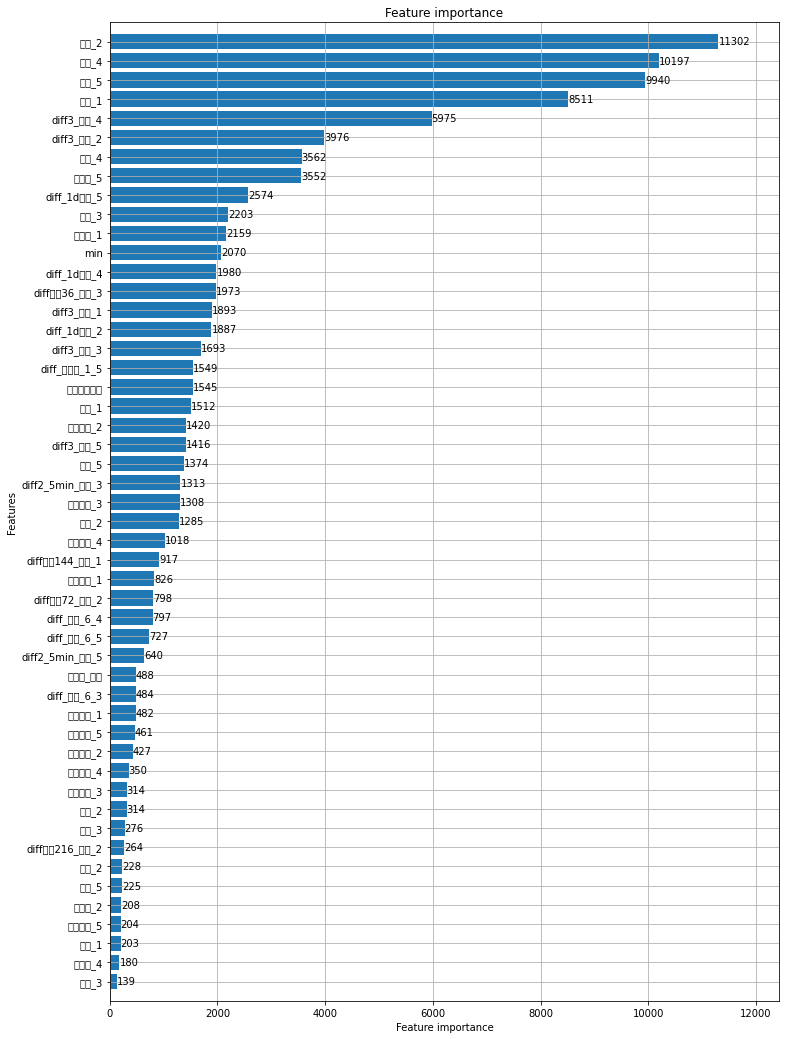

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

fig, ax = plt.subplots(figsize=(12, 18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
# 테스트 데이터를 이용하여 예측
y_test = model.predict(X_test)

# 모델 학습은 로그 변환한 결과값에 의하여 이루어졌으므로 예측값은 원래대로 지수 변환을 수행
y_test = np.expm1(y_test) + 1

In [ ]:
submission['Y18'] = y_test
submission.head(3)

,id,Y18
0,4752,20.563181
1,4753,20.574621
2,4754,20.454875


In [ ]:
submission.to_csv('col1.csv', index=False)

### 4. 모델 학습 및 검증
#### 4-2. COL2 조합
- COL2 조합에 대하여 모델의 학습 및 검증을 수행한다.
- 테스트 데이터를 이용하여 예측값을 구하고, 원상태로 돌리기 위해 지수 변환한다.
- 예측값을 제출 파일의 Y18칼럼으로 추가하고 csv 파일로 변환한다.

In [ ]:
# COL2 조합의 칼럼만 추출
X_train = data[COL2].iloc[:train.shape[0], :] 
X_test = data[COL2].iloc[train.shape[0]: , :] 
y_train = train['Y18']

In [ ]:
def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18707):
    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metrix'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01
    num_rounds = num_rounds
    plst = list(param.items())
    train_ds = lgb.Dataset(train_X, label=train_y)
    test_ds = lgb.Dataset(test_X, label=test_y)
    model = lgb.train(param, train_ds, num_rounds, test_ds, early_stopping_rounds=180)
    return model

In [ ]:
train_x, train_cv, y, y_cv = train_test_split(X_train, y_train, test_size=0.15, random_state=1217)

model = lgbm_regressor(train_X=train_x, train_y=y, test_X=train_cv, test_y=y_cv)

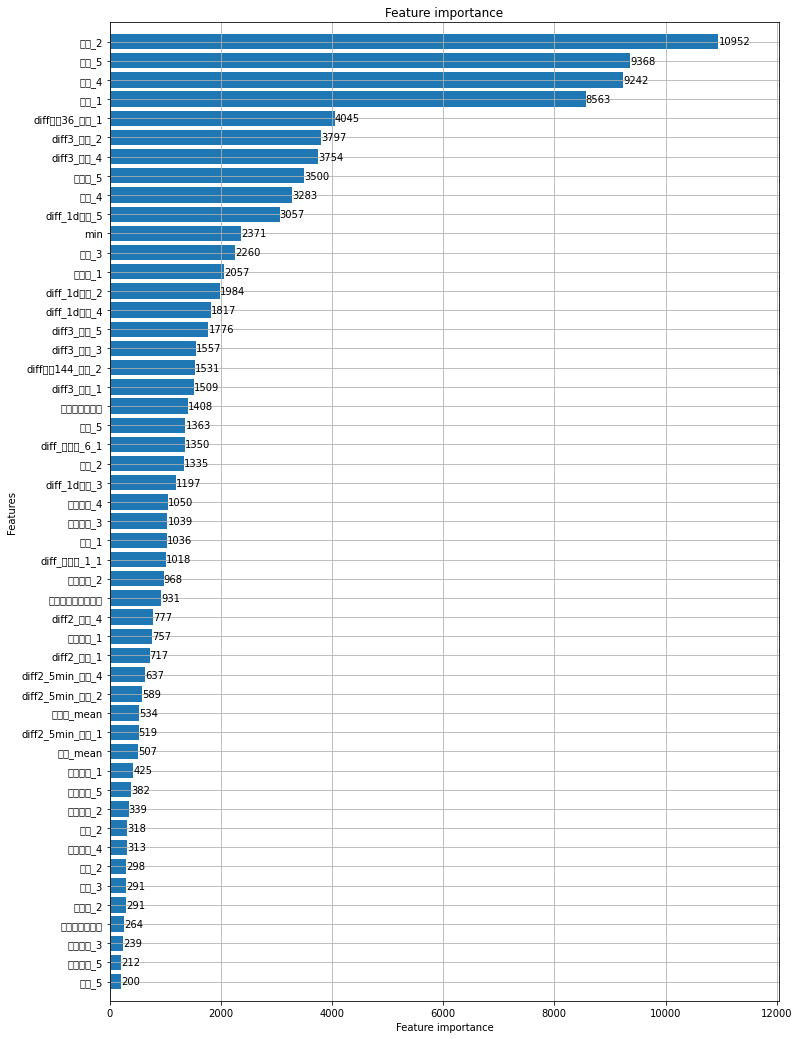

In [ ]:
fig, ax = plt.subplots(figsize=(12, 18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
y_test = model.predict(X_test)

# 모델 학습은 로그 변환한 결과값에 의하여 이루어졌으므로 예측값은 원래대로 지수 변환을 수행
y_test = np.expm1(y_test) + 1

submission['Y18'] = y_test
submission.head(3)

,id,Y18
0,4752,20.908745
1,4753,20.947063
2,4754,21.013435


In [ ]:
submission.to_csv('col2.csv', index=False)

### 4. 모델 학습 및 검증
#### 4-3. COL3 조합
- COL3 조합에 대하여 모델의 학습 및 검증을 수행한다.
- 테스트 데이터를 이용하여 예측값을 구하고, 원상태로 돌리기 위해 지수 변환한다.
- 예측값을 제출 파일의 Y18칼럼으로 추가하고 csv 파일로 변환한다.

In [ ]:
# COL3 조합의 칼럼만 추출
X_train = data[COL3].iloc[:train.shape[0], :] 
X_test = data[COL3].iloc[train.shape[0]: , :] 
y_train = train['Y18']

In [ ]:
def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18703):
    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metrix'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01
    num_rounds = num_rounds
    plst = list(param.items())
    train_ds = lgb.Dataset(train_X, label=train_y)
    test_ds = lgb.Dataset(test_X, label=test_y)
    model = lgb.train(param, train_ds, num_rounds, test_ds, early_stopping_rounds=180)
    return model

In [ ]:
train_x, train_cv, y, y_cv = train_test_split(X_train, y_train, test_size=0.15, random_state=1217)

model = lgbm_regressor(train_X=train_x, train_y=y, test_X=train_cv, test_y=y_cv)

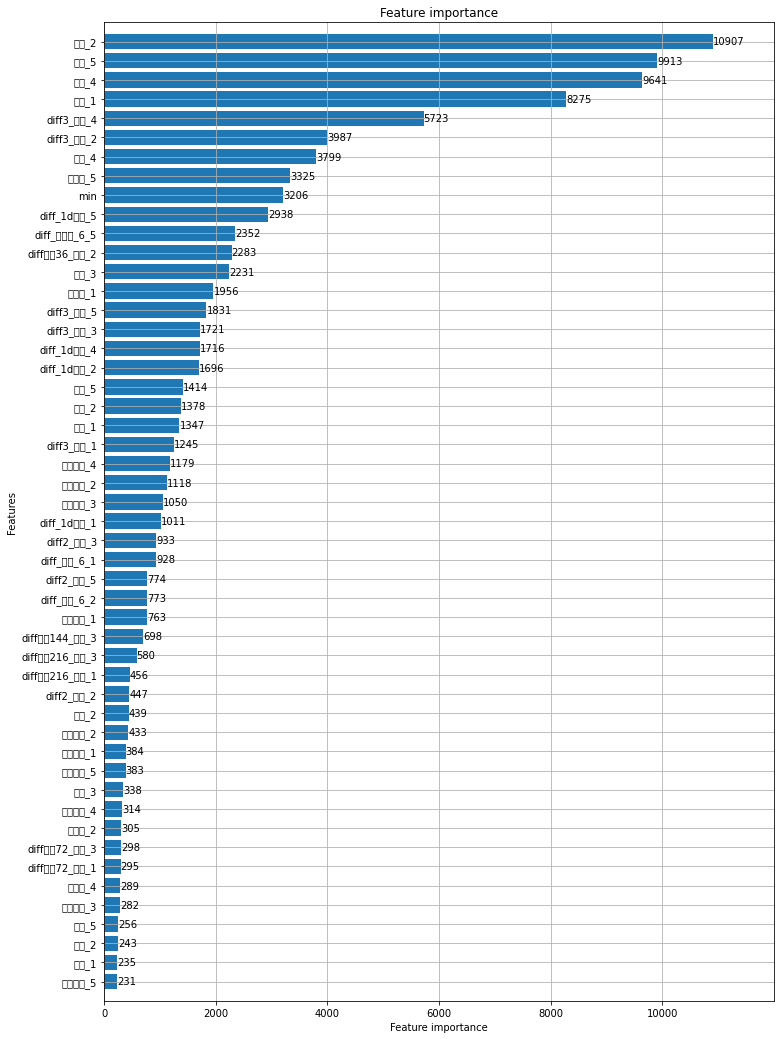

In [ ]:
fig, ax = plt.subplots(figsize=(12, 18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
y_test = model.predict(X_test)

# 모델 학습은 로그 변환한 결과값에 의하여 이루어졌으므로 예측값은 원래대로 지수 변환을 수행
y_test = np.expm1(y_test) + 1

submission['Y18'] = y_test
submission.head(3)

,id,Y18
0,4752,20.818930
1,4753,20.854560
2,4754,20.823562


In [ ]:
submission.to_csv('col3.csv', index=False)

### 4. 모델 학습 및 검증
#### 4-4. 앙상블
- COL1, COL2, COL3 3개의 칼럼 조합의 예측 결과를 앙상블을 이용하여 하나의 데이터로 저장한다.

In [ ]:
import os

folder = '/content/drive/MyDrive/ESAA/SW2'
nf = 0
for Q in os.listdir(folder):
    ext = os.path.splitext(Q)[-1]
    if ext == '.csv': 
        s = pd.read_csv(folder+"/"+Q)
    else: 
        continue
    if len(s.columns) !=2:
        continue
    if nf == 0: 
        slist = s
    else: 
        slist = pd.merge(slist, s, on="id")
    nf += 1

p = 88.4  # 이 파라미터는 멱평균 앙상블에 있어 중요한 수치임. 최적의 수치를 찾기 바랍니다.   
if nf >= 2:
    pred_m = 0
    for J in range(nf): pred_m = pred_m + slist.iloc[:,J+1]**p 
    pred_m = pred_m / nf    
    pred_m = pred_m**(1/p)

    submit = pd.DataFrame({'id': slist.id, 'Y18': pred_m})
    fname = "/content/drive/MyDrive/ESAA/SW2/submission_PM.csv"
    submit.fillna(0).to_csv(fname, index=False)

### 4. 모델 학습 및 검증
#### 4-5. COL4 조합
- 새로운 조합 COL4에 대하여 같은 방법으로 모델의 학습 및 예측을 수행한다.

In [ ]:
COL4= ['기온_1', '현지기압_1', '풍속_1', '풍속_2', '강수량_1', '해면기압_1', '현지기압_2', '기온_2', '해면기압_2', '해면기압_3', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2', '일사량_3', 
       '풍향_3', '풍속_3', '일사량_4', '습도_2', '강수량_3', '현지기압_3', '해면기압_4', '풍속_4', '풍향_4', '풍속_5', '현지기압_4', '기온_3', '현지기압_5', '습도_3', '기온_4', '기온_5', '해면기압_5', '일사량_5', 
       '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5', '시간별합', '시간별평균', '시간별표준편차',  '시간강수별합', '시간강수별평균', '시간강수별표준편차', 'min', 'rain',
       'time_cat_t1', 'time_cat_t2', 'time_cat_t3', 'time_cat_t4', 'time_cat_t5', 'time_cat_t6', 'time_cat_t7', 'time_cat_t8', 'time_cat_t9', 
       'diff_1d기온_1', 'diff_1d기온_2', 'diff_1d기온_3', 'diff_1d기온_4', 'diff_1d기온_5', 'diff2_기온_1', 'diff2_기온_2', 'diff2_기온_3', 'diff2_기온_4', 'diff2_기온_5', 'diff3_기온_1', 'diff3_기온_2', 
       'diff3_기온_3', 'diff3_기온_4', 'diff3_기온_5', 'diff2_5min_기온_1', 'diff2_5min_기온_2', 'diff2_5min_기온_3', 'diff2_5min_기온_4', 'diff2_5min_기온_5','diff_습도_1_1', 'diff_습도_1_2', 
       'diff_습도_1_3', 'diff_습도_1_4', 'diff_습도_1_5', 'diff_습도_6_1', 'diff_습도_6_2', 'diff_습도_6_3', 'diff_습도_6_4', 'diff_습도_6_5', 'diff_일사량_1_1', 'diff_일사량_1_2', 'diff_일사량_1_3', 
       'diff_일사량_1_4', 'diff_일사량_1_5', 'diff_일사량_6_1', 'diff_일사량_6_2', 'diff_일사량_6_3', 'diff_일사량_6_4', 'diff_일사량_6_5', '습도_mean', '일사량_mean', '일사량_습도']

In [ ]:
# COL4 조합의 칼럼만 추출
X_train = data[COL4].iloc[:train.shape[0], :] 
X_test = data[COL4].iloc[train.shape[0]: , :] 

In [ ]:
def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18692):
    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metrix'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01
    num_rounds = num_rounds
    plst = list(param.items())
    train_ds = lgb.Dataset(train_X, label=train_y)
    test_ds = lgb.Dataset(test_X, label=test_y)
    model = lgb.train(param, train_ds, num_rounds, test_ds, early_stopping_rounds=180)
    return model

In [ ]:
train_x, train_cv, y, y_cv = train_test_split(X_train, y_train, test_size=0.15, random_state=1217)

model = lgbm_regressor(train_X=train_x, train_y=y, test_X=train_cv, test_y=y_cv)

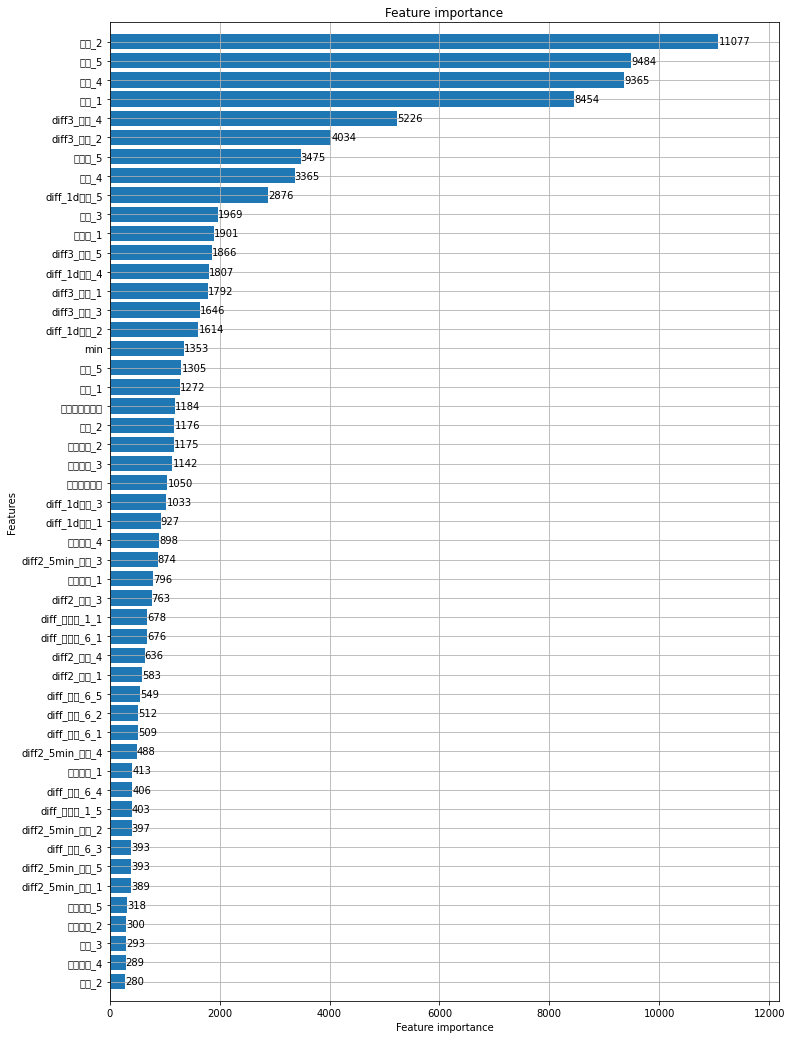

In [ ]:
fig, ax = plt.subplots(figsize=(12, 18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
y_test = model.predict(X_test)

# 모델 학습은 로그 변환한 결과값에 의하여 이루어졌으므로 예측값은 원래대로 지수 변환을 수행
y_test = np.expm1(y_test) + 1

submission['Y18'] = y_test
submission.head(3)

,id,Y18
0,4752,20.737073
1,4753,20.770701
2,4754,20.725219


In [ ]:
submission.to_csv('col4.csv', index=False)

### 4. 모델 학습 및 검증
#### 4-6. COL5 조합
- 새로운 조합 COL5에 대하여 같은 방법으로 모델의 학습 및 예측을 수행한다.

In [ ]:
COL5 =['기온_1', '풍속_1', '풍속_2', '강수량_1', '기온_2', '강수량_2', '일사량_1', '습도_1', '풍향_1', '일사량_2', '풍향_2', '일사량_3', '풍향_3', '풍속_3', '일사량_4', '습도_2', '강수량_3', '풍속_4', 
       '풍향_4', '풍속_5', '기온_3', '습도_3', '기온_4', '기온_5', '일사량_5', '풍향_5', '강수량_4', '습도_4', '습도_5', '강수량_5', '시간별합', '시간별평균', '시간별표준편차', 'min', 'rain', 
       '시간강수별합', '시간강수별평균', '시간강수별표준편차', 'time_cat_t1', 'time_cat_t2', 'time_cat_t3', 'time_cat_t4', 'time_cat_t5', 'time_cat_t6', 'time_cat_t7', 'time_cat_t8', 'time_cat_t9',
       'diff_36_기온_1', 'diff_72_기온_1', 'diff_144_기온_1', 'diff_216_기온_1', 'diff_36_기온_2', 'diff_72_기온_2', 'diff_144_기온_2', 'diff_216_기온_2', 'diff_36_기온_3', 'diff_72_기온_3',
       'diff_144_기온_3', 'diff_216_기온_3', 'diff_36_기온_4', 'diff_72_기온_4', 'diff_144_기온_4', 'diff_216_기온_4', 'diff_36_기온_5', 'diff_72_기온_5', 'diff_144_기온_5', 'diff_216_기온_5',
       'diff_습도_1_1', 'diff_습도_1_2', 'diff_습도_1_3', 'diff_습도_1_4', 'diff_습도_1_5', 'diff_습도_6_1', 'diff_습도_6_2', 'diff_습도_6_3', 'diff_습도_6_4', 'diff_습도_6_5',
       'diff_일사량_1_1', 'diff_일사량_1_2', 'diff_일사량_1_3', 'diff_일사량_1_4', 'diff_일사량_1_5', 'diff_일사량_6_1', 'diff_일사량_6_2', 'diff_일사량_6_3', 'diff_일사량_6_4', 'diff_일사량_6_5', '습도_mean', '일사량_mean', '일사량_습도']

In [ ]:
# COL5 조합의 칼럼만 추출
X_train = data[COL5].iloc[:train.shape[0], :] 
X_test = data[COL5].iloc[train.shape[0]: , :] 

In [ ]:
def lgbm_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2284, num_rounds=18714):
    param = {}
    param['boosting'] = 'dart'
    param['objective'] = 'regression'
    param['learning_rate'] = 0.05
    param['max_depth'] = 10
    param['metrix'] = 'rmse'
    param['is_training_metric'] = True
    param['min_child_weight'] = 1
    param['bagging_fraction'] = 0.8
    param['num_leaves'] = 128
    param['feature_fraction'] = 0.8
    param['bagging_freq'] = 6
    param['seed'] = seed_val
    param['min_split_gain'] = 0.01
    num_rounds = num_rounds
    plst = list(param.items())
    train_ds = lgb.Dataset(train_X, label=train_y)
    test_ds = lgb.Dataset(test_X, label=test_y)
    model = lgb.train(param, train_ds, num_rounds, test_ds, early_stopping_rounds=180)
    return model

In [ ]:
train_x, train_cv, y, y_cv = train_test_split(X_train, y_train, test_size=0.15, random_state=1217)

model = lgbm_regressor(train_X=train_x, train_y=y, test_X=train_cv, test_y=y_cv)

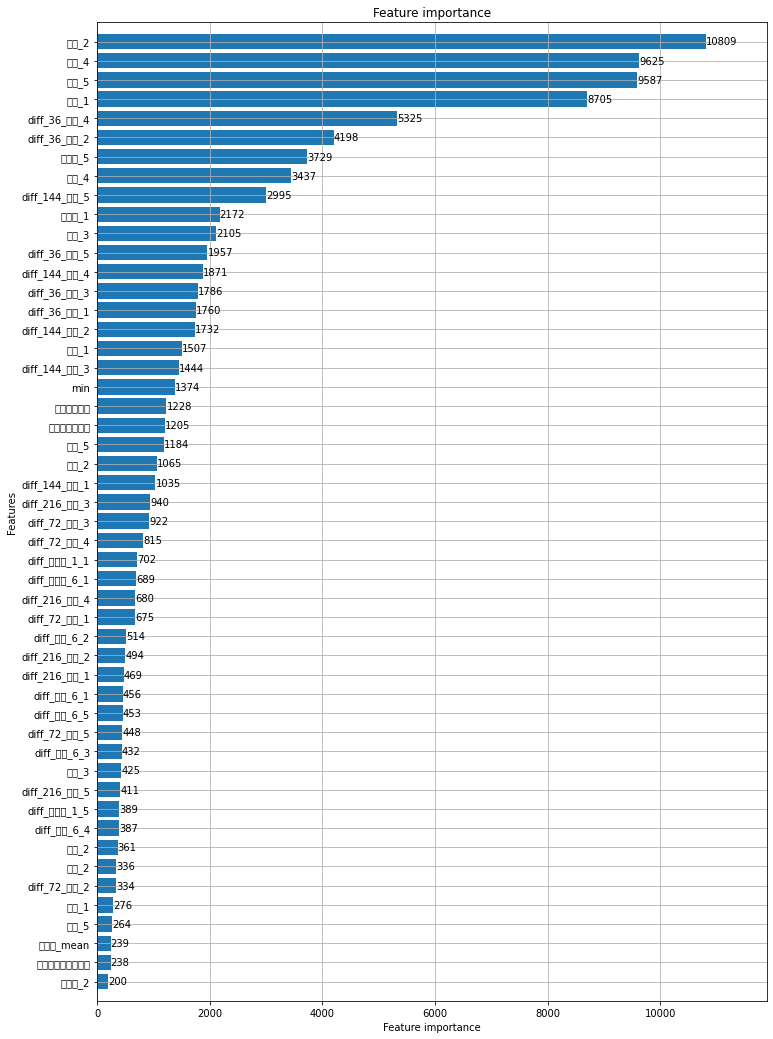

In [ ]:
fig, ax = plt.subplots(figsize=(12, 18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
y_test = model.predict(X_test)

# 모델 학습은 로그 변환한 결과값에 의하여 이루어졌으므로 예측값은 원래대로 지수 변환을 수행
y_test = np.expm1(y_test) + 1

submission['Y18'] = y_test
submission.head(3)

,id,Y18
0,4752,20.530781
1,4753,20.568267
2,4754,20.493237


In [ ]:
submission.to_csv('col5.csv', index=False)

### 5. 최종 결과
- 앙상블로 생성한 데이터와 추가적으로 칼럼을 조합하여 얻은 예측 데이터를 이용하여 최종 결과를 구한다.
- 각 데이터에 0.5, 0.1, 0.4의 가중치를 곱하여 데이터를 구하고 최종 파일을 저장한다.

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/ESAA/SW2/submission_PM.csv')['Y18']
b = pd.read_csv('/content/col4.csv')['Y18']
c = pd.read_csv('/content/col5.csv')['Y18']

In [ ]:
# 각 가중치를 0.5, 0.1, 0.4로 함
w1 = 0.5
w2 = 0.1
w3 = 0.4

pd.DataFrame({'id': slist.id, 'Y18': (w1*a+w2*b+w3*c)}).to_csv('final.csv',index=False)